   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes

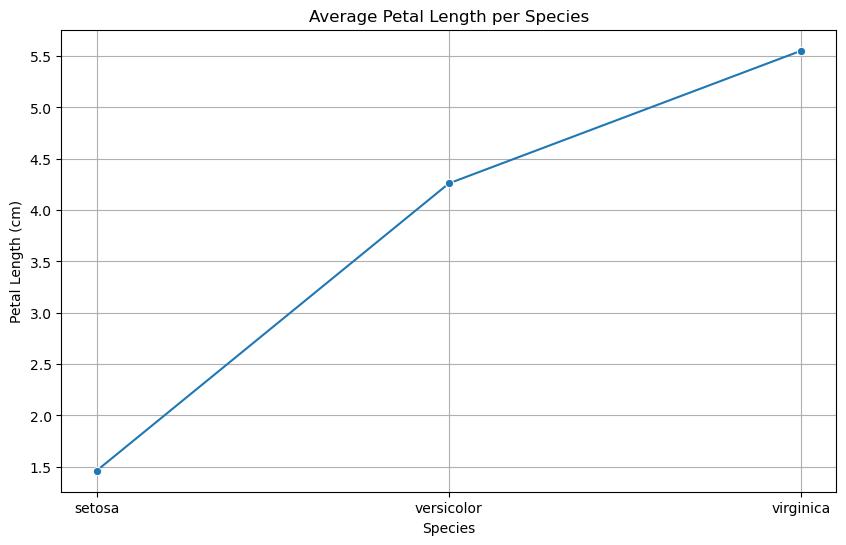

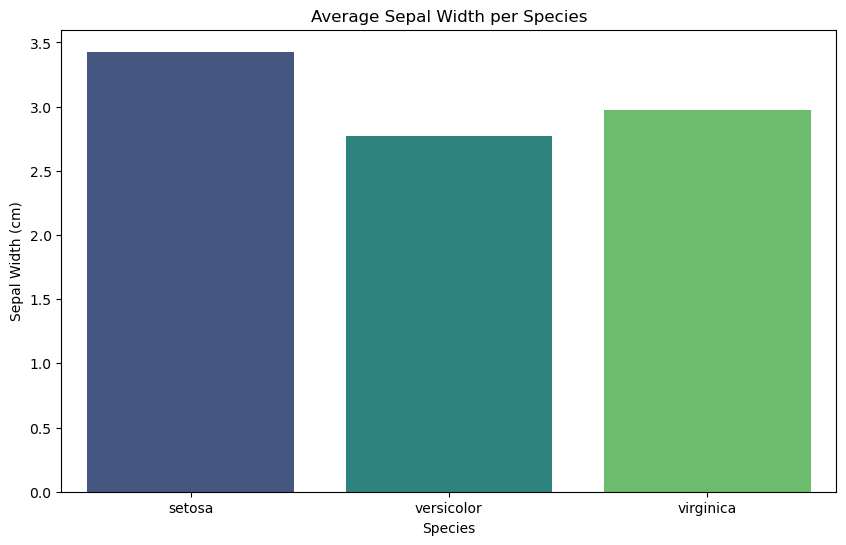

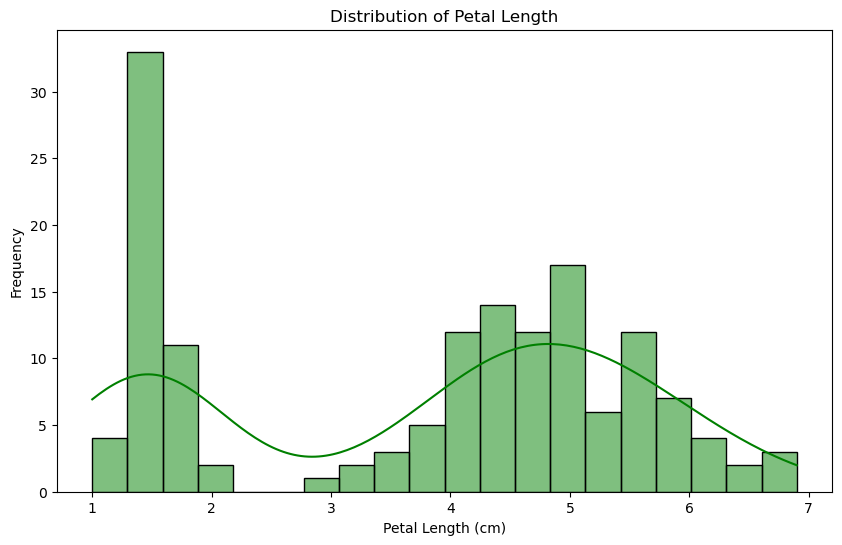

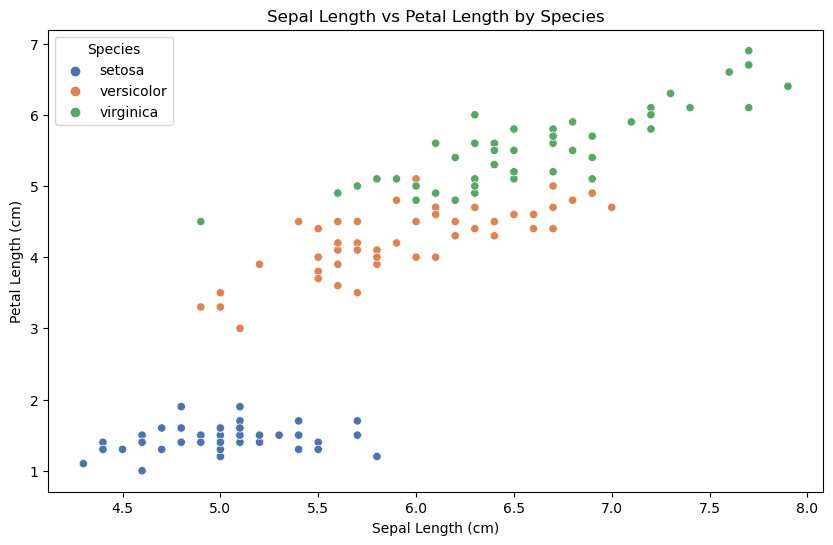

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Error handling for loading data
try:
    # Load Iris dataset
    iris = load_iris()
    # Create DataFrame
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

    # Display first few rows
    print(df.head())

    # Check structure
    print(df.info())
    print(df.isnull().sum())

    # Clean dataset (Iris has no missing values, but we'll show how to handle it)
    df_clean = df.dropna()

except FileNotFoundError:
    print("Dataset file not found.")
except Exception as e:
    print(f"An error occurred: {e}")
# Compute basic statistics
print(df_clean.describe())

# Group by species and compute mean for each numerical column
grouped_data = df_clean.groupby('species').mean()
print(grouped_data)

# Identify patterns (example)
print("\nInteresting Finding:")
print("Setosa species have significantly smaller petal length and width compared to Versicolor and Virginica.")

plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_data['petal length (cm)'], marker='o')
plt.title('Average Petal Length per Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=grouped_data.index, y='sepal width (cm)', data=grouped_data, palette='viridis')
plt.title('Average Sepal Width per Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df_clean['petal length (cm)'], bins=20, kde=True, color='green')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='deep')
plt.title('Sepal Length vs Petal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.show()
